In [5]:
import gprsim
import math
import matplotlib.pyplot as plt

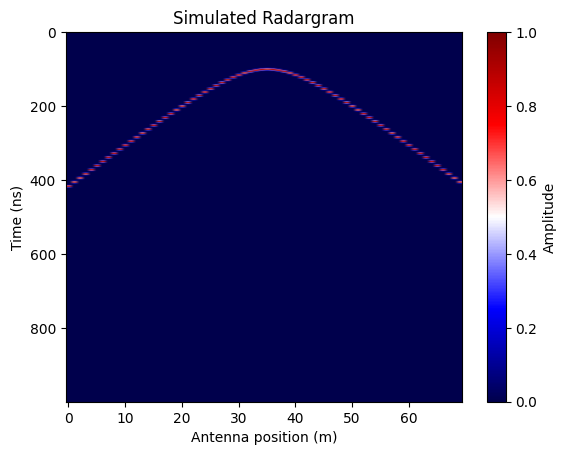

In [2]:
# Parameters
eps_r = 3                  # relative dielectric permittivity
rf = 400e6                 # radar frequency different from pulse frequency
dt = 1e-9                  # seconds
dx = 1                     # meters
region_shape = (70, 1e-6)  # grid (x,z)
SNR = math.inf
wavetype = 'gaussian'

# Point reflectors at (x,t) where x [m] and t [s]
reflectors = [(35, 50e-9)]

data, x_positions, t_samples = gprsim.gprsim(eps_r, rf, dt, dx, reflectors, region_shape, wavetype, SNR)

plt.imshow(data, aspect='auto', cmap='seismic')
plt.xlabel("Antenna position (m)")
plt.ylabel("Time (ns)")
plt.title("Simulated Radargram")
plt.colorbar(label="Amplitude")
plt.show()

Text(0.5, 1.0, 'c-10%')

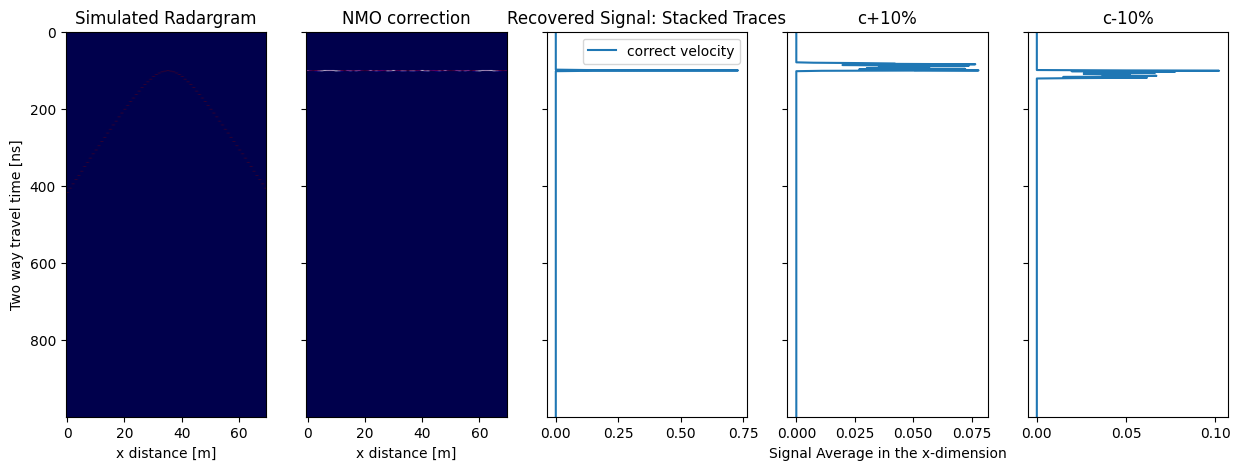

In [9]:
import numpy as np

stackh = lambda array : np.sum(array, axis=1)/array.shape[1]

t_0, x_0 = 100, 35 # The zero-offset time [ns] and 'CMP' [m] (the position of the reflector which we assume we know -- though can be estimated pretty easily)
eps_r = 3.0
wavetype = 'spike'
SNR = math.inf

data, x_positions, t_samples = gprsim.gprsim(eps_r, rf, dt, dx, reflectors, region_shape, wavetype, SNR)
corrected = gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt) 


fig, axs = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
plt.gca()
axs[0].imshow(data, aspect='auto', cmap='seismic')
im = axs[1].imshow(corrected, aspect='auto', cmap='seismic')
stack = stackh(corrected)
axs[2].plot(stack, range(0,len(stack)), label='correct velocity')


eps_r = 3.3
stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
axs[3].plot(stack, range(0,len(stack)), label='velocity+10%')


eps_r = 2.7
stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
axs[4].plot(stack, range(0,len(stack)), label='velocity-10%')


'''Desktop/ResolutionGuyotProj/Code/Point_Counting/Matrix_indev/Kmask/RoPeR_prcs/GPR_modeling
Making the plot pretty
'''
axs[0].set_title('Simulated Radargram'); axs[0].set_ylabel('Two way travel time [ns]'); axs[0].set_xlabel('x distance [m]')
axs[1].set_title('NMO correction'); axs[1].set_xlabel('x distance [m]')
axs[2].set_title('Recovered Signal: Stacked Traces'); axs[2].legend()
axs[3].set_title('c+10%'); axs[3].set_xlabel('Signal Average in the x-dimension')
axs[4].set_title('c-10%')

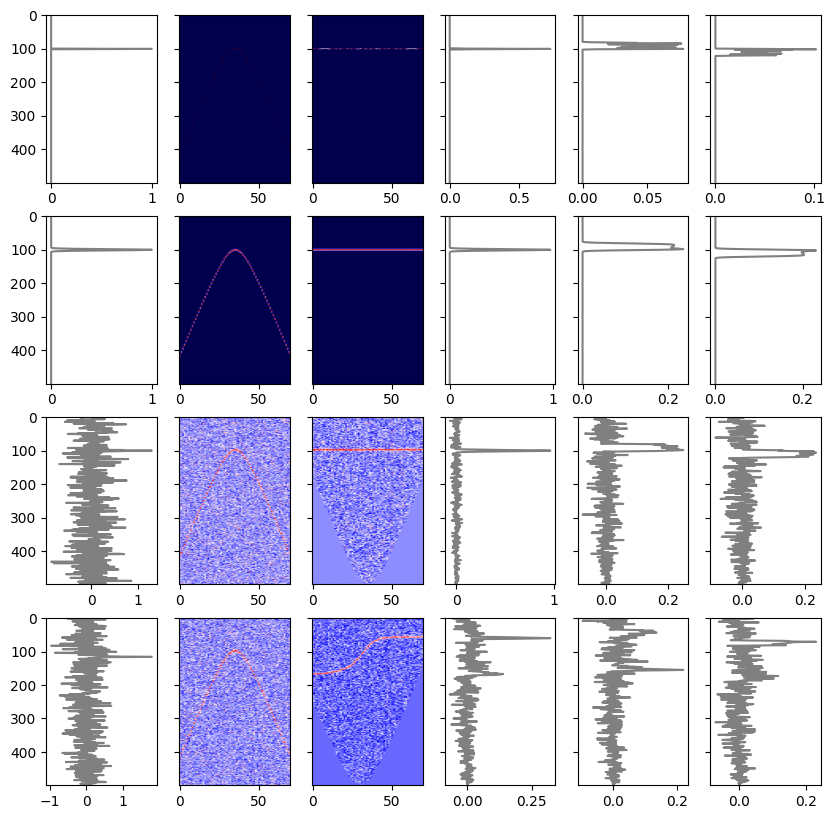

In [10]:
correct_t_0 = 100; correct_x_0 = 35; correct_eps_r = 3.0
params = {0:{'t_0':correct_t_0, 'x_0':correct_x_0, 'eps_r':correct_eps_r, 'wavetype':'spike', 'SNR':math.inf}, 
          1:{'t_0':correct_t_0, 'x_0':correct_x_0, 'eps_r':correct_eps_r, 'wavetype':'gaussian', 'SNR':math.inf}, 
          2:{'t_0':correct_t_0, 'x_0':correct_x_0, 'eps_r':correct_eps_r, 'wavetype':'gaussian', 'SNR':0.08}, 
          3:{'t_0':correct_t_0+20, 'x_0':correct_x_0-5, 'eps_r':correct_eps_r, 'wavetype':'gaussian', 'SNR':0.08}}

rf = 400e6                 # radar frequency different from pulse frequency
dt = 1e-9                  # seconds
dx = 1                     # meters
region_shape = (70, 5e-7)  # grid (x,z)
reflectors = [(35, 50e-9)]

fig, axs = plt.subplots(4, 6, figsize=(10,10), sharey=True)
if isinstance(axs, np.ndarray):
    grid = axs.shape
    
for i in range(grid[0]):
    # Simulate a survey
    t_0, x_0 = params[i]['t_0'], params[i]['x_0']
    eps_r = params[i]['eps_r']
    wavetype = params[i]['wavetype']
    SNR = params[i]['SNR']

    data, x_positions, t_samples = gprsim.gprsim(eps_r, rf, dt, dx, reflectors, region_shape, wavetype, SNR)
    corrected = gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt) 

    axs[i][1].imshow(data, aspect='auto', cmap='seismic')
    im = axs[i][2].imshow(corrected, aspect='auto', cmap='seismic')
    stack = stackh(corrected)
    axs[i][3].plot(stack, range(0,len(stack)), label='correct velocity', c='gray')
    axs[i][0].plot(data[:, x_0], range(0,len(stack)), c='gray')


    eps_r = 3.3
    stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
    axs[i][4].plot(stack, range(0,len(stack)), label='velocity+10%', c='gray')


    eps_r = 2.7
    stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
    axs[i][5].plot(stack, range(0,len(stack)), label='velocity-10%', c='gray')

    # '''Desktop/ResolutionGuyotProj/Code/Point_Counting/Matrix_indev/Kmask/RoPeR_prcs/GPR_modeling
    # Making the plot pretty
    # '''
    # axs[0].set_title('Simulated Radargram'); axs[0].set_ylabel('Two way travel time [ns]'); axs[0].set_xlabel('x distance [m]')
    # axs[1].set_title('NMO correction'); axs[1].set_xlabel('x distance [m]'), ; fig.colorbar(im, ax=axs[1], orientation='vertical')
    # axs[2].set_title('Recovered Signal: Stacked Traces'); axs[2].legend()
    # axs[3].set_title('c+10%'); axs[3].set_xlabel('Signal Average in the x-dimension')
    # axs[4].set_title('c-10%')